<a href="https://colab.research.google.com/github/vu211fa18067/Machine-Learning/blob/main/ML_Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifications**

In [2]:
import pandas as pd
loan_data = pd.read_csv("/content/drive/MyDrive/Datasets/loan_data.csv")
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


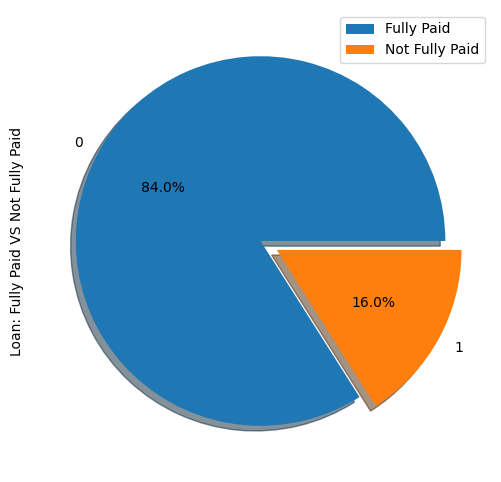

In [3]:
import matplotlib.pyplot as plt

def show_loan_distrib(data):
  count=""

  if isinstance(data, pd.DataFrame):
    count = data["not.fully.paid"].value_counts()
  else:
    count = data.value_counts()

  count.plot(kind = 'pie', explode = [0, 0.1], figsize = (6,6) ,autopct = '%1.1f%%', shadow = True)

  plt.ylabel("Loan: Fully Paid VS Not Fully Paid")
  plt.legend(["Fully Paid", "Not Fully Paid"])

  plt.show()

show_loan_distrib(loan_data)



**Variable Types:**
Before further, we need to check the variables’ type so that we can encode those that need to be encoded.

We notice that all the columns are continuous variables, except the purpose attribute, which needs to be encoded.

In [4]:
print(loan_data.dtypes)

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


In [5]:
encoded_loan_data = pd.get_dummies(loan_data, prefix="purpose",  drop_first=True)
print(encoded_loan_data.dtypes)

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
not.fully.paid                  int64
purpose_credit_card              bool
purpose_debt_consolidation       bool
purpose_educational              bool
purpose_home_improvement         bool
purpose_major_purchase           bool
purpose_small_business           bool
dtype: object


**Separate data into train and test**

In [6]:
from sklearn.model_selection import train_test_split

X = encoded_loan_data.drop('not.fully.paid', axis = 1)
y = encoded_loan_data['not.fully.paid']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify = y,random_state=2022)

**Random UnderSampling**

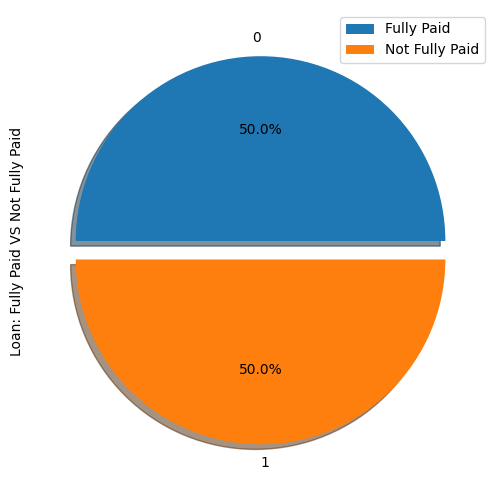

In [7]:
X_train_cp = X_train.copy()
X_train_cp['not.fully.paid'] = y_train
y_0 = X_train_cp[X_train_cp['not.fully.paid'] == 0]
y_1 = X_train_cp[X_train_cp['not.fully.paid'] == 1]
y_0_undersample = y_0.sample(y_1.shape[0])
loan_data_undersample = pd.concat([y_0_undersample, y_1], axis = 0)


# Visualize the proportion of borrowers
show_loan_distrib(loan_data_undersample)

**SMOTE OverSampling**

In [10]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train,y_train)

# Visualize the proportion of borrowers
show_loan_distrib(y_train_SMOTE)

ModuleNotFoundError: No module named 'imblearn'

**Logistic Regression**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X = loan_data_undersample.drop('not.fully.paid', axis = 1)
y = loan_data_undersample['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify = y, random_state=2022)

logistic_classifier = LogisticRegression()
logistic_classifier.fit(X_train, y_train)
y_pred = logistic_classifier.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[102  59]
 [ 82  79]]
              precision    recall  f1-score   support

           0       0.55      0.63      0.59       161
           1       0.57      0.49      0.53       161

    accuracy                           0.56       322
   macro avg       0.56      0.56      0.56       322
weighted avg       0.56      0.56      0.56       322



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Support Vector Machines**

In [12]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)


# Make Prediction & print the result
y_pred = svc_classifier.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       161
           1       0.58      0.68      0.62       161

    accuracy                           0.59       322
   macro avg       0.59      0.59      0.59       322
weighted avg       0.59      0.59      0.59       322

